# Определение критериев для успешной компьютерной игры

В интернет магазине компьютерных игр нужно выявить определяющие успешность игры закномерности. Это необходимо для планирования рекламного бюджета на будущий год. Для этого предоставлены данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

# Цель 
- Исследовать данные о продажах и выявить закономерности
- Составить портрет пользователя для каждого региона
- Выявить критерии для успешной игры

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## 1. Изучение данных из файла
Прочитаем данные, изучим общую информацию:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

try:
    df = pd.read_csv('E:/Python/Project sb 1/games.csv') 
except:
    df = pd.read_csv('/datasets/games.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод
В предосталенных данных таблица на более чем 16 тыс. строк и 11 колонок. Данные требуют тщательной предобработки с пропущенными значениями, проверкой дубликатов и приведением к нужным типам.

## 2. Предобработка данных
### 2.1 Замена названия столбцов (приведение к нижнему регистру)

In [2]:
df.columns = df.columns.str.lower()

### 2.2 Преобразование данных в нужные типы

Необходимо привести в численный тип строки с рейтингом:

In [3]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore')
df['rating'] = pd.to_numeric(df['rating'], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.3 Обработка пропусков

Обнаружено 2 строки, в которых отсутствует название и жанр. Удалим их ввиду малой информативности. Т.К. эти 2 игры для одной платформы, возможно сотрудники невнимательно заполнили данные.

В колонке год выпуска обнаружено менее 2% пропусков, это не много, но данный показатель является очень важным при анализе результатов, поэтому удалим сторки с пропусками в этой колонке. Возможной причиной, может быть системный сбой.

In [4]:
df[df['year_of_release'].isnull()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df[df['user_score']== 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


#### Ответ:
Аббревиатура 'tbd' в столбцах с рейтингом обозначает 'to be determened', что оценка пока еще не высталена. В нашем случае это равносильно отсутсвию значения, а дальше посмотрим, что с этим делать.





### 2.4 Подсчет суммарных продаж во всех регионах

In [6]:
df['all_sales'] = df['na_sales'] + df['eu_sales']+ df['jp_sales'] + df['other_sales']

### Вывод
С данными проведена предобработка, идем дальше.


## 3. Исследовательский анализ данных

### 3.1 Сколько игр выпускалось в разные годы? 


In [7]:
group_years = df.pivot_table(
    index='year_of_release',  
    values = 'platform', 
    aggfunc = 'count'
).reset_index()
group_years

,year_of_release,platform
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


<AxesSubplot:title={'center':'Количество игр в год'}, ylabel='Frequency'>

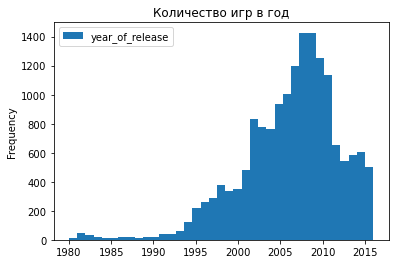

In [8]:
df.plot(
    kind = 'hist',
    y = 'year_of_release',
    bins=37,
    legend = True,
    title = 'Количество игр в год'
)

In [9]:
limit_year = 1994

#### Ответ:
По гистограмме очетливо видно, что бурный рост начался в 1995 году. Минимально было выпущено 9 игр в 1980 и максимально 1427 в 2008 году. Важны все предоставленные данные, но для удобства примем во внимание игры после 1994 года.

### 3.2 Как менялись продажи по платформам?

In [10]:
platform_sales = df.pivot_table(
    index='platform',  
    values = 'all_sales', 
    aggfunc = 'sum'
).sort_values(by = 'all_sales', ascending=False).reset_index()
platform_sales_top_10 = platform_sales.head(10)
platform_sales_top_10

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [11]:
platporm_group = df.query('platform in @platform_sales_top_10.platform and year_of_release > @limit_year').groupby(['platform', 'year_of_release']).agg({'all_sales':'sum'}).reset_index()
platporm_group

,platform,year_of_release,all_sales
0,DS,2004.0,17.27
1,DS,2005.0,130.14
2,DS,2006.0,119.81
3,DS,2007.0,146.94
4,DS,2008.0,145.31
...,...,...,...
106,X360,2012.0,99.74
107,X360,2013.0,88.58
108,X360,2014.0,34.74
109,X360,2015.0,11.96


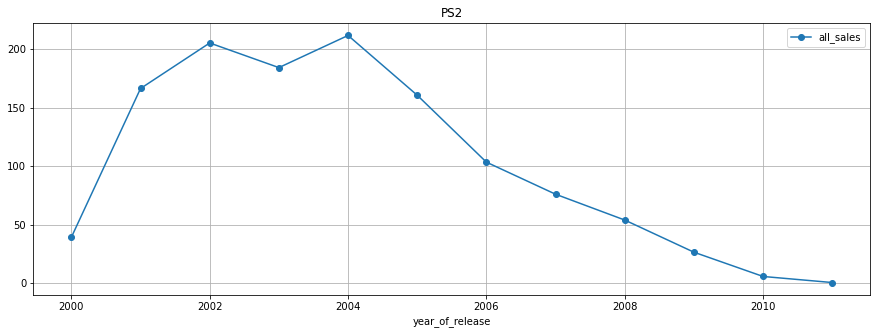

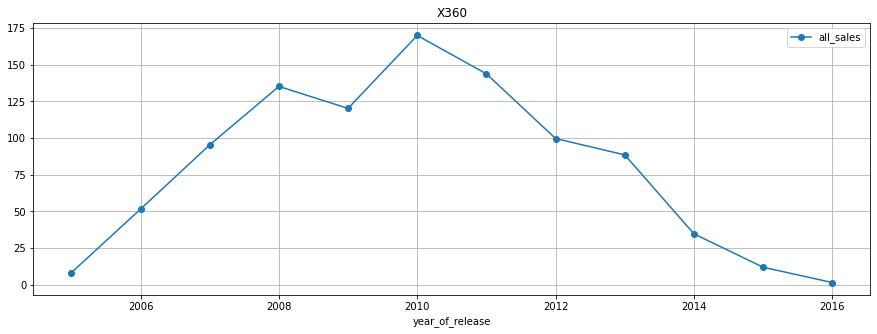

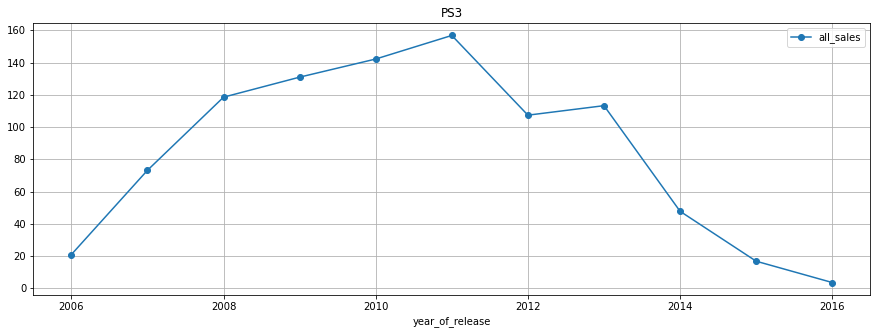

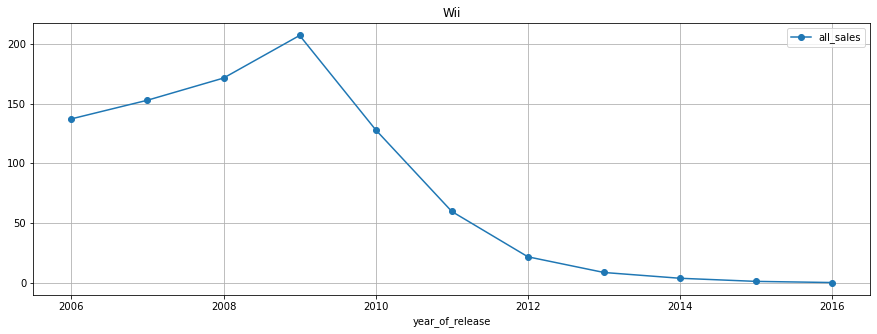

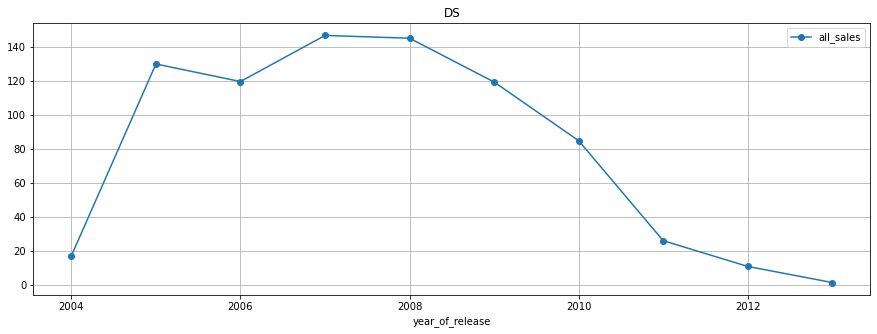

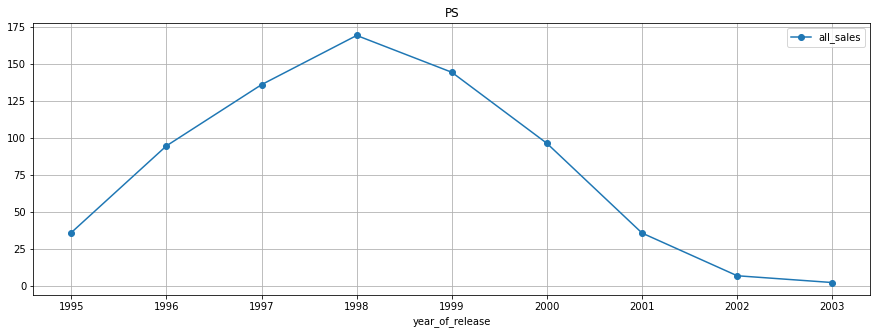

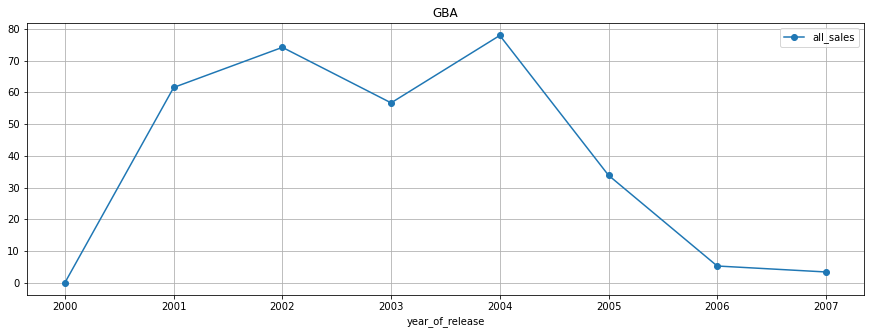

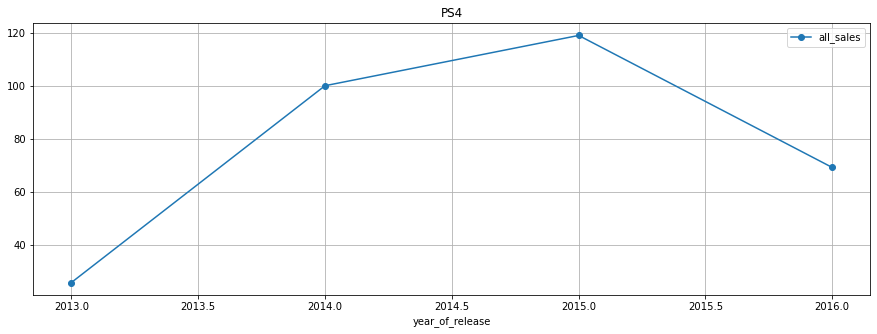

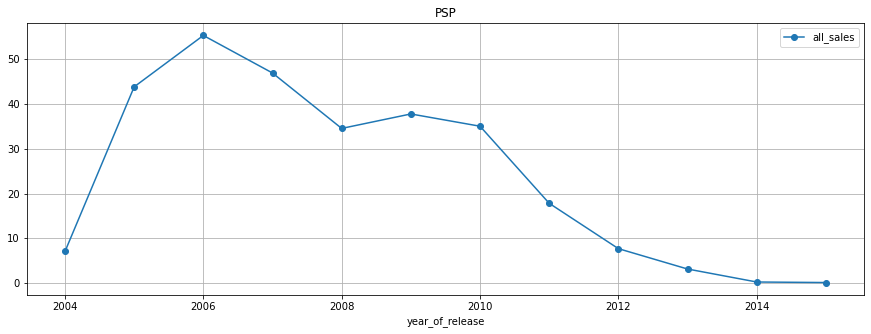

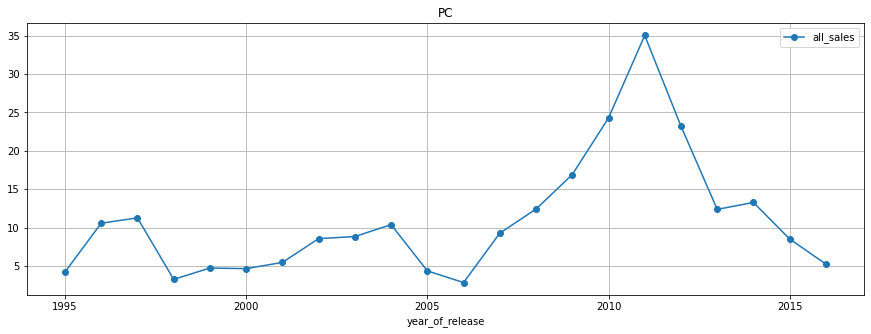

In [12]:
name_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
for element in name_platform:
    platporm_group[platporm_group['platform'] == element].plot(
        x = 'year_of_release',
        y = 'all_sales',
        style = 'o-',
        figsize = (15,5),
        grid = True,
        title = element
    )

#### Ответ:
Наибольшие суммарные продажи за рассматриваемый период у PS2: 1256 у.е. 

Согласно статистики продаж, жизненный цикл платформы около 5-6 лет.


Актульным будет являться период с 2013 года. Выбран из расчета того, что для платформ, выпущенных после 2012 года на настоящий момент (2016 год) есть еще не менее 2 лет до окончания жизненного цикла.

### 3.3	Какие платформы лидируют по продажам, растут или падают? 

In [13]:
actual_year = 2012

actual_platporm_group = df.query('year_of_release > @actual_year').groupby(['platform', 'year_of_release']).agg({'all_sales':'sum'}).reset_index()
actual_platporm_group


,platform,year_of_release,all_sales
0,3DS,2013.0,56.57
1,3DS,2014.0,43.76
2,3DS,2015.0,27.78
3,3DS,2016.0,15.14
4,DS,2013.0,1.54
5,PC,2013.0,12.38
6,PC,2014.0,13.28
7,PC,2015.0,8.52
8,PC,2016.0,5.25
9,PS3,2013.0,113.25


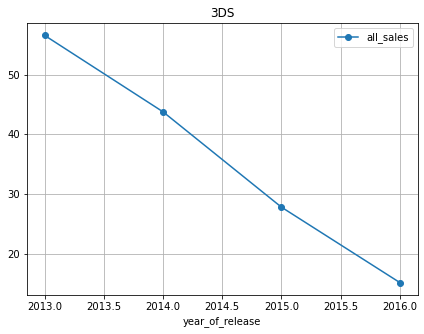

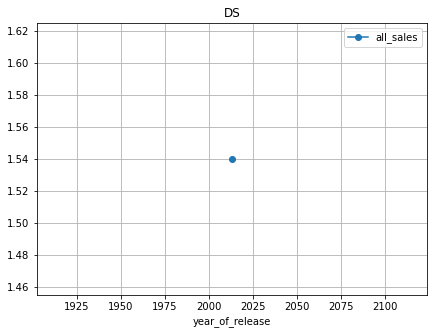

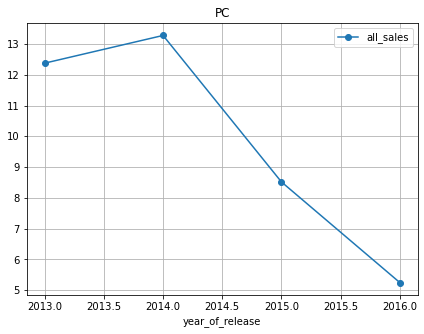

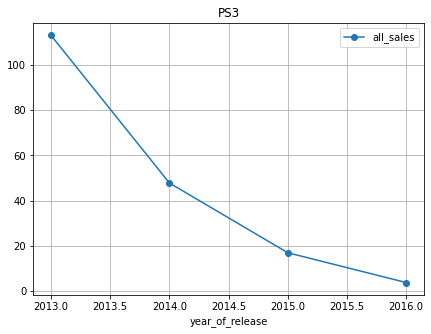

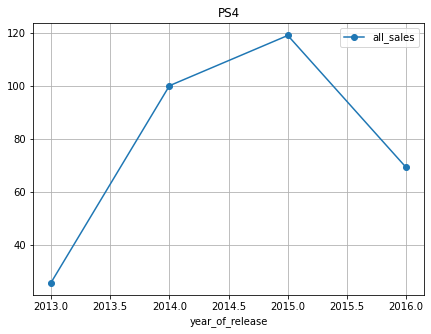

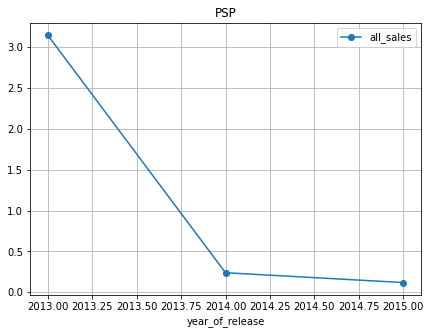

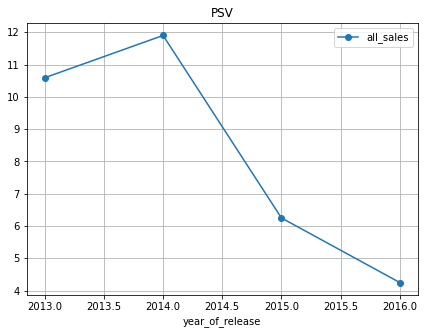

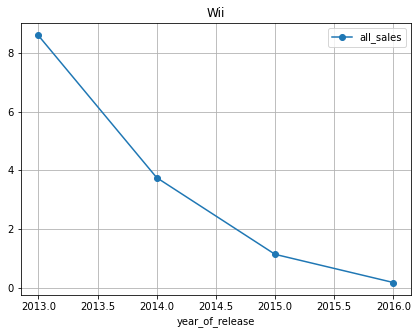

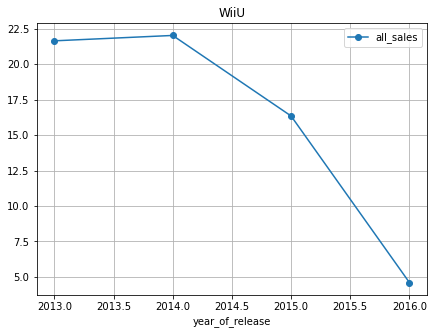

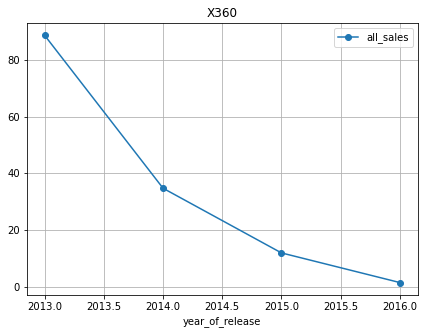

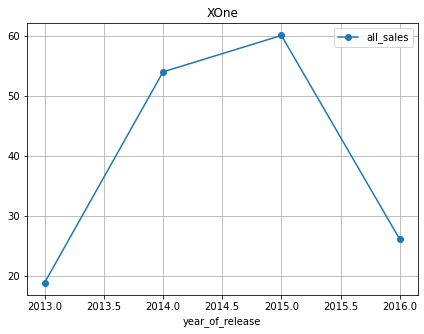

In [14]:
# Построение графиков продаж у актульных платформ
actual_platporm = actual_platporm_group['platform'].unique()
actual_platporm
for element in actual_platporm:
    actual_platporm_group[actual_platporm_group['platform'] == element].plot(
        x = 'year_of_release',
        y = 'all_sales',
        style = 'o-',
        figsize = (7,5),
        grid = True,
        title = element
    )

#### Ответ:
По приведенным графикам продаж видно, что ПОТЕНЦИАЛЬНО прибыльными можно назвать лишь две поатформы: XOne и PS4. У остальных платформ продажи стремительно падают на протяжении последних нескольких лет. 

### 3.4 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

In [15]:
df_ps2 = df[df['platform'] == 'PS2']

df_ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16671,Kanokon: Esuii,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16689,Real Rode,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Теперь вернемся к пропускам и значениям 'tbd', т.к. их замена на какое либо значение повлияет на результат анализа и взаимосвязи между значенями в других стобцах, строки с пропусками и значениями 'tbd' в интересующих нас столбцах мы удалим.

In [16]:
df_ps2 = df_ps2.dropna(subset = ['critic_score', 'user_score'])
df_ps2 = df_ps2.drop(df_ps2[df_ps2['user_score'] == 'tbd'].index)
df_ps2['user_score'] = pd.to_numeric(df_ps2['user_score'])
df_ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16011,Kao the Kangaroo Round 2,PS2,2005.0,Platform,0.01,0.01,0.00,0.00,58.0,8.7,E,0.02
16050,Just Cause,PS2,2006.0,Action,0.01,0.01,0.00,0.00,67.0,7.9,M,0.02
16287,Metal Slug Anthology,PS2,2007.0,Shooter,0.00,0.00,0.01,0.00,80.0,8.1,T,0.01
16429,Greg Hastings' Tournament Paintball Max'd,PS2,2006.0,Shooter,0.01,0.00,0.00,0.00,70.0,9.2,E10+,0.01


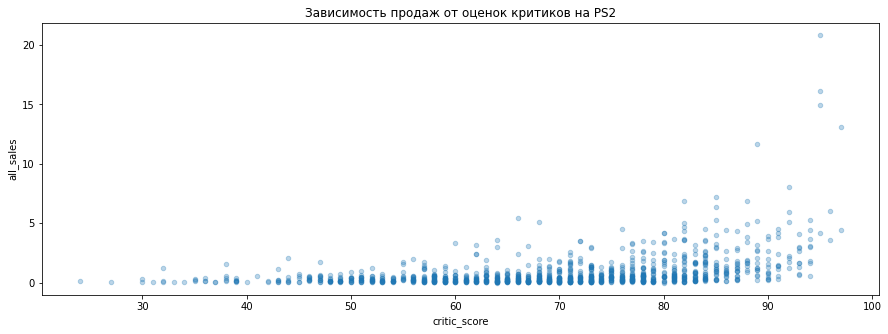

<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей на PS2'}, xlabel='user_score', ylabel='all_sales'>

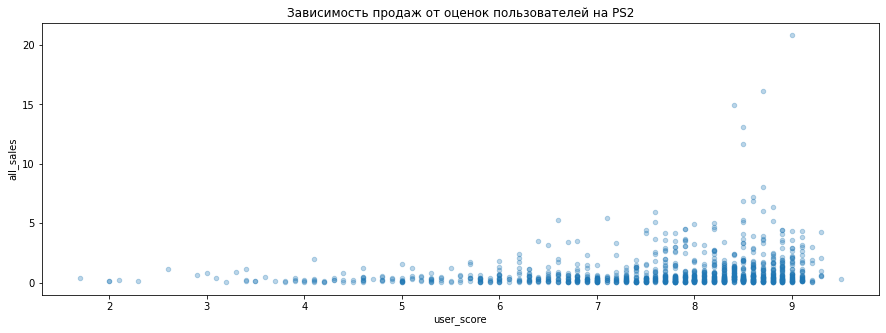

In [17]:
df_ps2.plot(
    x='critic_score', 
    y='all_sales', 
    kind = 'scatter',
    alpha = 0.3,
    figsize = (15,5),
    title = 'Зависимость продаж от оценок критиков на PS2'
    
)
plt.show()
df_ps2.plot(
    x='user_score', 
    y='all_sales', 
    kind = 'scatter',
    alpha = 0.3,
    figsize = (15,5),
    title = 'Зависимость продаж от оценок пользователей на PS2'
    
)


In [18]:
# Корреляция между отзывами критиков и продажами:
df_ps2['critic_score'].corr(df_ps2['all_sales'])

0.38921959991789346

In [19]:
# Корреляция между отзывами пользователей и продажами:
df_ps2['user_score'].corr(df_ps2['all_sales'])

0.16941987448591256

#### Ответ:
На графиках и по корреляции прослеживается прямая но слабая зависимость между отзывами и продажами. Для оценки критиков коэффициет корреляции около 0.4, для оценки пользователей более слабый, около 0.17.

### 3.5 Соотнесем выводы с продажами игр на других платформах

In [20]:
# Проделаем все в томже порядке, как и в предыдущем пункте:
df_all = df[df['platform'] != 'PS2']
df_all = df_all.dropna(subset = ['critic_score', 'user_score'])
df_all = df_all.drop(df_all[df_all['user_score'] == 'tbd'].index)
df_all['user_score'] = pd.to_numeric(df_all['user_score'])
df_all

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16673,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


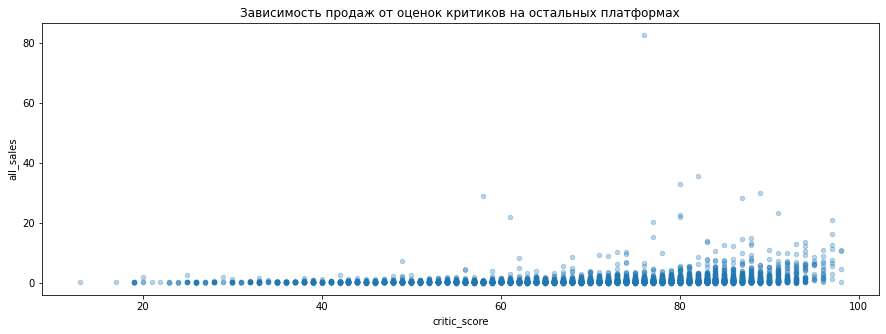

<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей на остальных платформах'}, xlabel='user_score', ylabel='all_sales'>

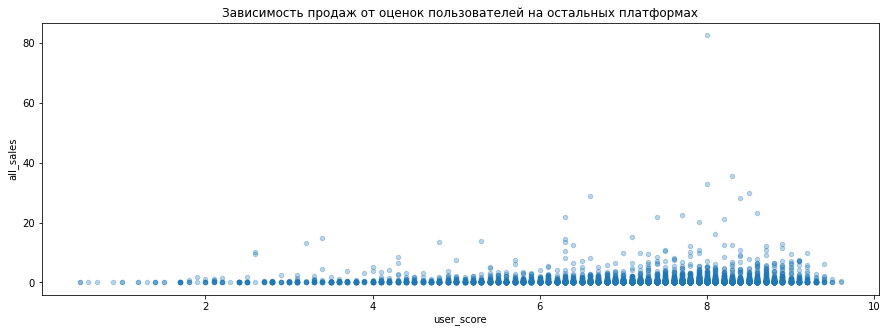

In [21]:
df_all.plot(
    x='critic_score', 
    y='all_sales', 
    kind = 'scatter',
    alpha = 0.3,
    figsize = (15,5),
    title = 'Зависимость продаж от оценок критиков на остальных платформах'
    
)
plt.show()
df_all.plot(
    x='user_score', 
    y='all_sales', 
    kind = 'scatter',
    alpha = 0.3,
    figsize = (15,5),
    title = 'Зависимость продаж от оценок пользователей на остальных платформах'
    
)

In [22]:
# Корреляция между отзывами критиков и продажами:
df_all['critic_score'].corr(df_all['all_sales'])

0.21848271467445565

In [23]:
# Корреляция между отзывами пользователей и продажами:
df_all['user_score'].corr(df_all['all_sales'])

0.07748192409952433

#### Ответ:
На графиках и по корреляции остальных платформ прослеживается прямая но еще более слабая (примерно в 2 раза) зависимость между отзывами и продажами. Для оценки критиков коэффициет корреляции около 0.22, для оценки пользователей, около 0.08. А это значит, что на менее популярных платформах отзывы меньше влияют на продажи, чем на более популярных. Звучит вполне логично.

### 3.6 Посмотрим на общее распределение игр по жанрам. 

In [24]:
genre_sales = df.pivot_table(
    index='genre',  
    values = 'all_sales', 
    aggfunc = 'mean'
).sort_values(by = 'all_sales', ascending=False).reset_index()
genre_sales

,genre,all_sales
0,Platform,0.932173
1,Shooter,0.795503
2,Role-Playing,0.623872
3,Racing,0.583403
4,Sports,0.566980
5,Fighting,0.527126
6,Action,0.517711
7,Misc,0.458577
8,Simulation,0.446701
9,Puzzle,0.418224


Text(0.5, 1.0, 'Продажи по жанрам')

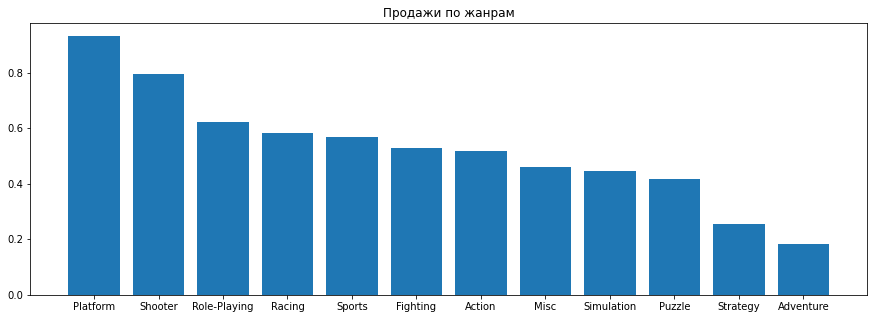

In [25]:

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(genre_sales['genre'], genre_sales['all_sales'])
ax.set_title('Продажи по жанрам')



#### Ответ:
Наиболее прибыльным из данной выборки является жанр'Platform'. В среднем, прибыль игр данного жанра превышает среднюю прибыль игр жанра 'Adventure' в 5 раз, который занимает последнюю строчку по прибыли. Эта разница очень значительна.

## 4 Составим портрет пользователя каждого региона
### 4.1	Самые популярные платформы (топ-5). 

In [26]:
platform_NA_sales = df.pivot_table(
    index='platform',  
    values = 'na_sales', 
    aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending=False).reset_index()
platform_NA_sales_top_5 = platform_NA_sales.head()
platform_NA_sales_top_5['na_sales'] /= platform_NA_sales['na_sales'].sum()
platform_NA_sales_top_5

,platform,na_sales
0,X360,0.136852
1,PS2,0.132620
2,Wii,0.112872
3,PS3,0.089382
4,DS,0.086863


In [27]:
platform_EU_sales = df.pivot_table(
    index='platform',  
    values = 'eu_sales', 
    aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending=False).reset_index()
platform_EU_sales_top_5 = platform_EU_sales.head()
platform_EU_sales_top_5['eu_sales'] /= platform_EU_sales['eu_sales'].sum()
platform_EU_sales_top_5

,platform,eu_sales
0,PS2,0.139932
1,PS3,0.136221
2,X360,0.111669
3,Wii,0.108143
4,PS,0.088099


In [28]:
platform_JP_sales = df.pivot_table(
    index='platform',  
    values = 'jp_sales', 
    aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending=False).reset_index()
platform_JP_sales_top_5 = platform_JP_sales.head()
platform_JP_sales_top_5['jp_sales'] /= platform_JP_sales['jp_sales'].sum()
platform_JP_sales_top_5

,platform,jp_sales
0,DS,0.135328
1,PS,0.107772
2,PS2,0.107294
3,SNES,0.089836
4,3DS,0.077595


#### Ответ:
- Для региона NA наиболее популярная платформа X360, она занимает около 13,7% рынка региона.
- Для региона EU наиболее популярная платформа PS2, она занимает около 14% рынка региона.
- Для региона JP наиболее популярная платформа DS, она занимает около 13,5% рынка региона.

### 4.2	Самые популярные жанры (топ-5). 

In [29]:
genre_NA_sales = df.pivot_table(
    index='genre',  
    values = 'na_sales', 
    aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending=False).reset_index()
genre_NA_sales_top_5 = genre_NA_sales.head()
genre_NA_sales_top_5['na_sales'] /= genre_NA_sales['na_sales'].sum()
genre_NA_sales_top_5

,genre,na_sales
0,Action,0.199749
1,Sports,0.155532
2,Shooter,0.134583
3,Platform,0.101237
4,Misc,0.092549


In [30]:
genre_EU_sales = df.pivot_table(
    index='genre',  
    values = 'eu_sales', 
    aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending=False).reset_index()
genre_EU_sales_top_5 = genre_EU_sales.head()
genre_EU_sales_top_5['eu_sales'] /= genre_EU_sales['eu_sales'].sum()
genre_EU_sales_top_5

,genre,eu_sales
0,Action,0.214150
1,Sports,0.155432
2,Shooter,0.130908
3,Racing,0.097564
4,Misc,0.087759


In [31]:
genre_JP_sales = df.pivot_table(
    index='genre',  
    values = 'jp_sales', 
    aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending=False).reset_index()
genre_JP_sales_top_5 = genre_JP_sales.head()
genre_JP_sales_top_5['jp_sales'] /= genre_JP_sales['jp_sales'].sum()
genre_JP_sales_top_5

,genre,jp_sales
0,Role-Playing,0.273953
1,Action,0.124432
2,Sports,0.104475
3,Platform,0.100845
4,Misc,0.083332


#### Ответ:
- Для региона NA наиболее популярный жанр Action, она занимает около 20% рынка региона.
- Для региона EU наиболее популярный жанр Action, она занимает около 21.5% рынка региона.
- Для региона JP наиболее популярный жанр Role-Playing, она занимает около 27.4% рынка региона.

Восток - дело тонкое...
### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [32]:
rating_NA_sales = df.pivot_table(
    index='rating',  
    values = 'na_sales', 
    aggfunc = 'sum'
).sort_values(by = 'na_sales', ascending=False).reset_index()
rating_NA_sales_top_5 = rating_NA_sales.head()
rating_NA_sales_top_5['na_sales'] /= rating_NA_sales['na_sales'].sum()
rating_NA_sales_top_5


,rating,na_sales
0,E,0.409188
1,T,0.240436
2,M,0.236869
3,E10+,0.111814
4,K-A,0.000810


In [33]:
rating_EU_sales = df.pivot_table(
    index='rating',  
    values = 'eu_sales', 
    aggfunc = 'sum'
).sort_values(by = 'eu_sales', ascending=False).reset_index()
rating_EU_sales_top_5 = rating_EU_sales.head()
rating_EU_sales_top_5['eu_sales'] /= rating_EU_sales['eu_sales'].sum()
rating_EU_sales_top_5

,rating,eu_sales
0,E,0.392221
1,M,0.267263
2,T,0.235819
3,E10+,0.104106
4,AO,0.000337


In [34]:
rating_JP_sales = df.pivot_table(
    index='rating',  
    values = 'jp_sales', 
    aggfunc = 'sum'
).sort_values(by = 'jp_sales', ascending=False).reset_index()
rating_JP_sales_top_5 = rating_JP_sales.head()
rating_JP_sales_top_5['jp_sales'] /= rating_JP_sales['jp_sales'].sum()
rating_JP_sales_top_5

,rating,jp_sales
0,E,0.435015
1,T,0.332448
2,M,0.141060
3,E10+,0.088272
4,K-A,0.003206


#### Ответ:
По всем регионам картина влияния рейтинга ESRB практически одинакова. Наиболее продаваемы игры с рейтингом E около 40% рынка во всех регионах.


## 5 Проверка гипотез
### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 


#### Нулевая гипотеза H0: 
"Средние пользовательские рейтинги платформ Xbox One и PC равны".
#### Альтернативная гипотеза Н1: 
"Средние пользовательские рейтинги платформ Xbox One и PC не равны"

In [35]:
np.var(df_all[df_all['platform'] == 'XOne']['user_score'], ddof=1)

1.7963991130820411

In [36]:
np.var(df_all[df_all['platform'] == 'PC']['user_score'], ddof=1)

2.318949759476074

In [37]:
df_all[df_all['platform'] == 'XOne']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,Agatha Christie's The ABC Murders,XOne,2016.0,Adventure,0.01,0.00,0.00,0.00,66.0,7.5,NaN,0.01
16392,Goat Simulator,XOne,2016.0,Simulation,0.00,0.01,0.00,0.00,53.0,6.3,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01


<AxesSubplot:title={'center':'Пользовательский рейтинг XOne'}, ylabel='Frequency'>

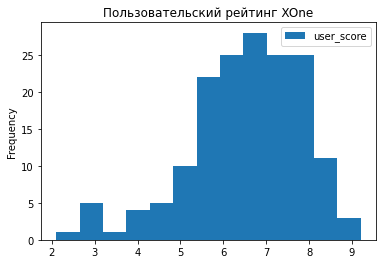

In [38]:
df_all[df_all['platform'] == 'XOne'].plot(
    kind = 'hist',
    y = 'user_score',
    bins=13,
    legend = True,
    title = 'Пользовательский рейтинг XOne'
)

<AxesSubplot:title={'center':'Пользовательский рейтинг PC'}, ylabel='Frequency'>

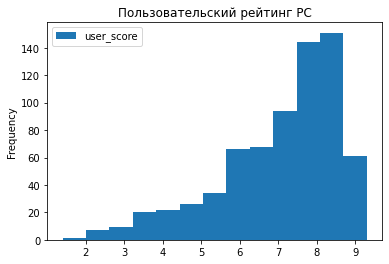

In [39]:
df_all[df_all['platform'] == 'PC'].plot(
    kind = 'hist',
    y = 'user_score',
    bins=13,
    legend = True,
    title = 'Пользовательский рейтинг PC'
)

In [40]:
st.ttest_ind(df_all[df_all['platform'] == 'XOne']['user_score'], df_all[df_all['platform'] == 'PC']['user_score'], equal_var=False)

Ttest_indResult(statistic=-4.2106271461701406, pvalue=3.462578002314619e-05)

Полученное значение p-value говорит о том, что средний рейтинг этих платформ можеть совпадать крайне маловероятно, поэтому отвергаем Нулевую гипотезу, даже если alpha = 0.01.

### 5.2  Средние пользовательские рейтинги жанров Action  и Sports  разные. 
#### Нулевая гипотеза H0: 
"Средние пользовательские рейтинги жанров Action и Sports равны".
#### Альтернативная гипотеза Н1: 
"Средние пользовательские рейтинги жанров Action и Sports не равны"

In [41]:
st.ttest_ind(df_all[df_all['genre'] == 'Action']['user_score'], df_all[df_all['genre'] == 'Sports']['user_score'], equal_var=False)

Ttest_indResult(statistic=0.7904437244106187, pvalue=0.4293933339632622)

Полученное значение p-value говорит о том, что средний пользовательский рейтинг этих жанров можеть совпадать, с вероятностью более 42%, поэтому принимаем Нулевую гипотезу, даже если alpha = 0.05. 

### Вывод 
Проверив данные гипотезы можно с огромной долей вероятности сказать, что средние пользовательские рейтинги платформ Xbox One и PC сильно отличаются. А также, средниие пользовательские рейтинги жанров Action и Sports крайне маловероятно не равны.

Для проверки использован критерий Стьюдента, т.к. он подходит для проверки гипотезы о равенстве средних двух генеральных совокупностей.

## 6. Общий вывод
В ходе проведения анализа были обрботаны данные прадж интернет магазина игр. Была предоставлена таблица с данными более чем на 16 тыс. строк, в которой отражены продажи игр разных жанров, платформ, для различных регионов, а также рейтинги игр. В результате анализа выявлено следующее:
- До 1995 года игр было выпущено крайне мало, далее был бурный рост, пик которого пришелся на 2008 год (1427 игр), далее спад. На 2016 год зафиксировано 502 игры;
- Жизненный цикл одной платформы около 5-6 лет. Наибольшее число продаж за жизненный цикл зафиксировано у PS2: 1256 у.е.;
- В настоящее время (2016 год) наиболее потенциально прибыльными являются платформы XOne и PS4;
- Отзывы влияют на продажы умеренно, причем отзывы кртириков влияют значительно больше, чем отзывы пользователей. Чем менее популярна игра, тем меньше влияние отзывов на продажи;
- Жанр значительно влияет на прибыль игры. Наиболее прибыльным из данной выборки является жанр'Platform';
- В разных регионах предпочтения по платформам различны;
- Предпочтения по жанрам в EA и NU распределены схожим образом. В JP ситуация немного другая;
- Рейтинг ESRB влияет на продажи во всех регионах примерно одинаково. Наиболее продаваемый E;
- Была отвергнута гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Также была отвергнута гипотеза о том, что Средние пользовательские рейтинги жанров Action и Sports разные;


- Исходя из анализа, на 2017 год стоит сделать ставку на игры жанра Action для платформы PS4. Данные игры будут наиболее популярны.